In [209]:
# Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date
import mplfinance as mpf
import math
import os

import ta # librería para indicadores técnicos
from scipy.stats import norm # Para la distribución normal
from math import sqrt

from io import StringIO

In [210]:
# Definir Ticker
ticker = "NVDA"
ticker1 = yf.Ticker(ticker)

# Obtener información general de la empresa
info_empresa = ticker1.info
longName = str(info_empresa['longName'])
industry = str(info_empresa['industry'])
marketCap = round((info_empresa['marketCap'] / 1e9),2)


In [211]:
# Definir fechas
today = date.today()

end = today - timedelta(days = 1)
start = end - timedelta(days = 1460)
today_format = today.strftime("%Y-%m-%d") # Formato: YYYY-MM-DD#Definir fechas de análisis
start = start.strftime("%Y-%m-%d")
end = end.strftime("%Y-%m-%d")

In [212]:
#Descargar data de ticker desde yfinance
data = yf.download(ticker, start = start , end = end)

<ipython-input-212-4de1882c9c08>:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start = start , end = end)
[*********************100%***********************]  1 of 1 completed


In [213]:
# Preview data
data.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2021-08-12,19.862806,19.986542,19.578411,19.827881,151652000
2021-08-13,20.145212,20.171158,19.808927,19.862813,183063000
2021-08-16,19.907713,20.243998,19.411765,20.092320,210876000
2021-08-17,19.416754,19.728093,19.226159,19.643272,204585000
2021-08-18,18.999643,19.592384,18.959727,19.458667,285913000


In [214]:
# Save the data to CSV file
data.to_csv("data.csv")

In [215]:
data = pd.read_csv("data.csv", index_col=[0], header=0, skiprows=2, parse_dates=[0])
data

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
Date,,,,,
2021-08-12,19.862806,19.986542,19.578411,19.827881,151652000
2021-08-13,20.145212,20.171158,19.808927,19.862813,183063000
2021-08-16,19.907713,20.243998,19.411765,20.092320,210876000
2021-08-17,19.416754,19.728093,19.226159,19.643272,204585000
2021-08-18,18.999643,19.592384,18.959727,19.458667,285913000
...,...,...,...,...,...
2025-08-04,180.000000,180.199997,174.520004,175.160004,148174600
2025-08-05,178.259995,180.259995,175.899994,179.619995,156407600
2025-08-06,179.419998,179.899994,176.250000,176.330002,137192300


In [216]:
data.columns = ['Close', 'High', 'Low', 'Open','Volume']

In [217]:
data = data.iloc[2:]

In [218]:
data.index = pd.to_datetime(data.index, errors='coerce')

In [219]:
data.describe()

,Close,High,Low,Open,Volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,63.603533,64.748675,62.328665,63.592359,4.228334e+08
std,48.728934,49.507716,47.862892,48.765454,1.803749e+08
min,11.214161,11.721578,10.800634,10.958453,1.051570e+08
25%,22.166230,22.544307,21.776628,22.218108,2.856335e+08
50%,43.467543,43.893796,42.546069,43.399082,4.114109e+08
75%,113.767103,116.165799,110.847947,113.182030,5.247902e+08
max,182.699997,183.880005,180.399994,182.899994,1.543911e+09


In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2021-08-16 to 2025-08-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1000 non-null   float64
 1   High    1000 non-null   float64
 2   Low     1000 non-null   float64
 3   Open    1000 non-null   float64
 4   Volume  1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 46.9 KB


In [221]:
# Calculate Return (%)
ret = data.Close.pct_change().dropna()

In [222]:
# Para obtener el numero de bins correcto debemos saber la cantidad de filas
ret.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 999 entries, 2021-08-17 to 2025-08-08
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
999 non-null    float64
dtypes: float64(1)
memory usage: 15.6 KB


In [223]:
# Calculo Número de Bins
numero = len(data) - 1
numero
numero_bins = int(math.sqrt(numero))

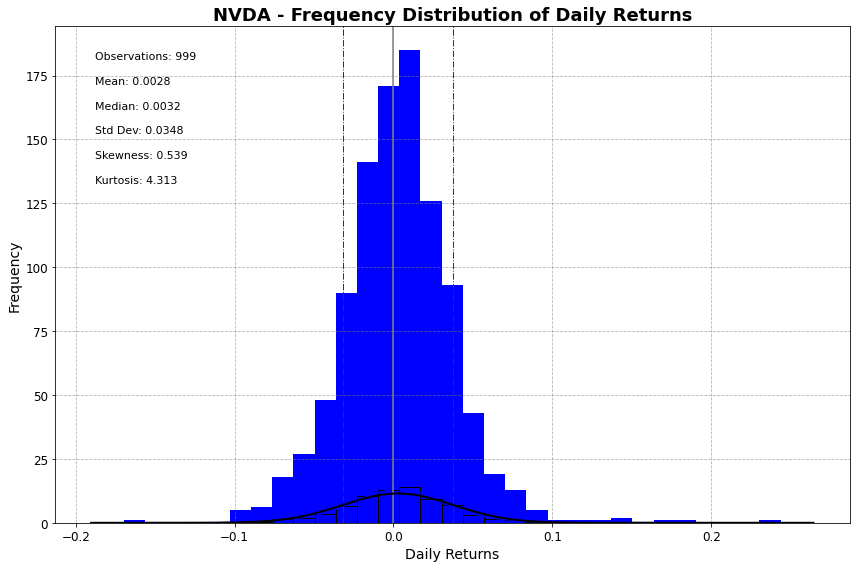

In [224]:
# Create a probability distribution
mean_ret = ret.mean()
median_ret = ret.median()
std_ret = ret.std()


ret.plot(kind="hist", figsize = (12,8), bins = numero_bins, color="blue")
sns.histplot(ret, bins=numero_bins, color="blue", stat="density", kde=True)

# --- 2. Título y Etiquetas de Ejes ---
plt.title(f'{ticker} - Frequency Distribution of Daily Returns', fontsize=18, fontweight='bold')
plt.xlabel("Daily Returns", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# --- 3. Cuadrícula Mejorada ---
plt.grid(True, linestyle='--', alpha=0.6, color='gray') # Líneas más sutiles

# --- 4. Marcar la Media, Mediana y Cero ---
mean_ret = ret.mean()
median_ret = ret.median()


plt.axvline(0, color='grey', linestyle='-', linewidth=1.5, label='Retorno Cero') # Línea en 0
#plt.axvline(mean_ret, color='red', linestyle='--', linewidth=2)
#plt.axvline(median_ret, color='green', linestyle=':', linewidth=2, label=f'Mediana: {median_ret:.4f}')

#--- 5. Añadir Líneas para Desviaciones Estándar (indicador de volatilidad) ---
std_ret = ret.std()
left_limit = mean_ret - std_ret
right_limit = mean_ret + std_ret

plt.axvline(left_limit, color='purple', linestyle='-.', linewidth=1)
plt.axvline(right_limit, color='purple', linestyle='-.', linewidth=1)

# --- 6. Superponer una Curva de Distribución Normal (para comparar) ---
# Esto te permite ver qué tan "normal" es la distribución de tus retornos.
xmin, xmax = plt.xlim() # Obtener los límites del eje x
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_ret, std_ret)
plt.plot(x, p, 'k', linewidth=2, label='Curva Normal (Teórica)') # 'k' para negro

# --- 7. Añadir Métricas Descriptivas en el Gráfico (Texto) ---
# Calcular skewness y kurtosis para entender la forma de la distribución
skewness = ret.skew()
kurtosis = ret.kurtosis()

# Posicionar el texto cuidadosamente
plt.text(0.05, 0.95, f'Observations: {len(ret)}', transform=plt.gca().transAxes, fontsize=11, verticalalignment='top')
plt.text(0.05, 0.90, f'Mean: {mean_ret:.4f}', transform=plt.gca().transAxes, fontsize=11, verticalalignment='top')
plt.text(0.05, 0.85, f'Median: {median_ret:.4f}', transform=plt.gca().transAxes, fontsize=11, verticalalignment='top')
plt.text(0.05, 0.80, f'Std Dev: {std_ret:.4f}', transform=plt.gca().transAxes, fontsize=11, verticalalignment='top')
plt.text(0.05, 0.75, f'Skewness: {skewness:.3f}', transform=plt.gca().transAxes, fontsize=11, verticalalignment='top')
plt.text(0.05, 0.70, f'Kurtosis: {kurtosis:.3f}', transform=plt.gca().transAxes, fontsize=11, verticalalignment='top')

# Ajustar el diseño para que todo quepa bien
plt.tight_layout()

# Guarda la figura
nombre_imagen = f'{ticker}_Probability Distribution with Density Curve_Plot.png'
plt.savefig(
    nombre_imagen,
    dpi=300,        # Resolución en puntos por pulgada (dots per inch). Mayor DPI = mayor calidad.
    bbox_inches='tight', # Elimina el espacio en blanco extra alrededor del gráfico
    facecolor='white',   # Fondo blanco para el gráfico guardado (útil si tu tema es oscuro)
    transparent=False    # Si es True, el fondo será transparente (para PNG).
)

# Visualizar en Notebook

plt.show()

In [225]:
# Calculate Daily Mean Ret
daily_mean_ret = ret.mean()
daily_mean_ret

0.00281821866079825

In [226]:
# Calculate Daily Variance Ret
var_daily = ret.var()

In [227]:
std_daily = np.sqrt(var_daily)

In [228]:
std_daily = np.sqrt(var_daily)

In [229]:
ret.std()

0.0347647750140112

In [230]:
# Calculate Annual Mean Ret
annual_mean_ret = daily_mean_ret*252
annual_mean_ret

0.7101911025211589

In [231]:
# Calculate Anual Variance return
annual_var_return = var_daily*252
annual_var_return

0.30456457460725395

In [232]:
# Calculate Anual STD return
annual_std_return = np.sqrt(annual_var_return)
annual_std_return

0.5518736944331138

In [233]:
# Calculate Anual STD return
ret.std()*np.sqrt(252)

0.551873694433114

In [234]:
# Calculo de Indice Sharpe
# 2. Definir la Tasa Libre de Riesgo Anual
# Esta es la tasa de retorno de una inversión "sin riesgo", como bonos del gobierno.
# Se expresa como un valor decimal (ej. 4% = 0.04)
annual_risk_free_rate = 0.04

In [235]:
# 4. Calcular el Índice de Sharpe
# La fórmula es: (Retorno de la Cartera - Tasa Libre de Riesgo) / Volatilidad
indice_sharpe = (annual_mean_ret - annual_risk_free_rate) / annual_std_return

In [236]:
# 5. Imprimir el resultado
print(f"Retorno Promedio Anual: {annual_mean_ret :.2%}")
print(f"Volatilidad Anual (Desviación Estándar): {annual_std_return:.2%}")
print(f"Tasa Libre de Riesgo Anual: {annual_risk_free_rate:.2%}")
print(f"---")
print(f"Índice de Sharpe: {indice_sharpe:.2f}")

Retorno Promedio Anual: 71.02%
Volatilidad Anual (Desviación Estándar): 55.19%
Tasa Libre de Riesgo Anual: 4.00%
---
Índice de Sharpe: 1.21


**How to Interpret the Result**   
The Sharpe Ratio tells you how much additional return you earned for the risk you took.
- Greater than 1.0: Generally considered a good risk-adjusted return.
- Between 0 and 1.0: Adequate return, but could be improved.
- Less than 0: The investment is underperforming the risk-free investment, indicating poor performance.

## Crear Informe en Pdf

In [237]:
# Modificar formatos de fecha para reporte
# Start Date
start_dt = datetime.strptime(start, "%Y-%m-%d")                           
start = start_dt.strftime("%m-%d-%Y")

# End Date
end_dt = datetime.strptime(end, "%Y-%m-%d")  
end = end_dt.strftime("%m-%d-%Y")

#  Today Date
todaty_format_dt = datetime.strptime(today_format, "%Y-%m-%d")  
today_format = todaty_format_dt.strftime("%m-%d-%Y")


In [238]:
from fpdf import FPDF

In [239]:
# 1. Create a new PDF object
pdf = FPDF()

# 2. Add a page Page 1. Portada y Resumen Ejecutivo
pdf.add_page()

# 3. Set a font
pdf.set_font("Helvetica","B", size=16)

# 4. Add a cell for the title
# The cell is a rectangular area where content is placed.
pdf.cell(200, 10, txt=f'{ticker} - Financial Analysis Report.', ln=True, align="L")
pdf.ln(10) # Add 10mm of vertical space

# 5. Add more text
pdf.set_font("Helvetica", "B", size=12)
pdf.cell(200, 10, txt=f'Performance and Risk Assessment for {longName}', ln=True)
pdf.set_font("Helvetica", "", size=12)
pdf.cell(200, 10, txt=f'Date Period: From {start} to {end}.', ln=True)
pdf.cell(200, 10, txt=f'Industry: {industry}.', ln=True)
pdf.cell(200, 10, txt=f'MarketCap: {marketCap} Bn.', ln=True)
pdf.cell(200, 10, txt="Executive Summary:", ln=True)
pdf.set_font("Helvetica", size=12)
# Add the paragraph to the PDF
# w: Width of the cell (0 means it extends to the right margin)
# h: Height of each line (in mm)
# txt: The text to be added
# border: Set to 1 to see the cell borders
parrafo = """This report analyzes the daily returns of a financial asset to assess its historical performance and risk profile. Using Python and libraries such as Pandas and NumPy, key descriptive statistics such as mean, standard deviation, skewness, and kurtosis were calculated. The findings reveal the asset's volatility, the probability of extreme price movements, and its risk-adjusted return. This analysis provides a solid foundation for investment decision-making, demonstrating the ability to transform raw data into strategic insights and communicate complex findings concisely."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.set_font("Helvetica", "", size=12)
pdf.cell(200, 10, txt='Tools: Python Libraries: Pandas, Matplotlib, Seaborn, FPDF, Yfinance, Datetime.', ln=True)
pdf.ln(10) # Add 10mm of vertical spacepdf.cell(200, 10, txt=f'Report Date: {today_format}.', ln=True)

pdf.cell(200,10, text=f'Report Date: {today_format}.', ln=True)

# --- Página 2: Datos y Análisis de Rendimiento Encabezado: "Métricas Clave"
pdf.add_page()  # Añade una nueva página en blanco
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Returns and Volatility Analysis", ln=True, align="L")
pdf.ln(10) # Add 10mm of vertical space

pdf.set_font("Arial", 'B', 14)
pdf.cell(200, 10, txt="Calculation of the Average Annual Return", ln=True)

# Add the paragraph to the PDF
# w: Width of the cell (0 means it extends to the right margin)
# h: Height of each line (in mm)
# txt: The text to be added
# border: Set to 1 to see the cell borders
pdf.set_font("Arial", '', 12)
parrafo = """Mean Return: Displays the annualized average return."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
# Move the cursor down for the next content
pdf.ln(5) # Add 10mm of vertical space
pdf.cell(200, 10, txt=f"Average Annual Return: {annual_mean_ret :.2%}", ln=True)
pdf.ln(10) # Add 10mm of vertical space

pdf.set_font("Arial", 'B', 14)
pdf.cell(200, 10, txt="Calculation of the Annual Standard Deviation", ln=True)

pdf.set_font("Arial", '', 12)
parrafo = """Standard Deviation (Std Dev Return): Displays the annualized standard deviation. This metric is defined as the primary measure of an asset's risk or volatility."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
# Move the cursor down for the next content
pdf.ln(5) # Add 10mm of vertical space
pdf.cell(200, 10, txt=f"Annual Volatility (Standard Deviation): {annual_std_return:.2%}", ln=True)
pdf.ln(10) # Add 10mm of vertical space

pdf.set_font("Arial", 'B', 14)
pdf.cell(200, 10, txt="Sharpe Ratio Calculation", ln=True)

pdf.set_font("Arial", '', 12)
parrafo = """Sharpe Ratio: It explains that this value measures risk-adjusted performance, helping to determine whether the asset's return justifies the volatility it entails."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
# Move the cursor down for the next content
pdf.ln(5) # Add 10mm of vertical space
pdf.cell(200, 10, txt=f"Annual Risk-Free Rate: {annual_risk_free_rate:.2%}", ln=True)
pdf.cell(200, 10, txt=f"Sharpe Ratio: {indice_sharpe:.2f}", ln=True)
pdf.ln(10) # Add 10mm of vertical space
#Índice de Sharpe: Presenta el valor del Índice de Sharpe. Explica que este valor mide el rendimiento ajustado por riesgo, ayudando a determinar si el retorno del activo justifica la volatilidad que conlleva.




# --- Página 3: Análisis Gráfico Encabezado: "Distribución de Retornos
pdf.add_page(orientation = 'L')  # Añade una nueva página en blanco
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Graphic Analysis", ln=True, align="L")

# Agregar la imagen
# pdf.image(nombre, x, y, ancho)
# x=10: 10 mm desde el margen izquierdo.
# y=20: 20 mm desde la parte superior.
# Obtener el ancho de la página y el ancho de la imagen
ancho_pagina = pdf.w
ancho_imagen = 200 # Ancho deseado de la imagen en mm

# Calcular la posición 'x' para centrar la imagen
# Formula: (Ancho de la página - Ancho de la imagen) / 2
x_centrado = (ancho_pagina - ancho_imagen) / 2

pdf.image(nombre_imagen, x=x_centrado, y=20, w=220)
pdf.ln(150) # Add 10mm of vertical space

pdf.set_font("Arial", '', 12)
parrafo = """Graph Interpretation: Explain what the histogram shows. State whether the distribution is "normal" or has fat tails, which could indicate a higher risk of extreme events. You may use a caption to describe the graph."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
# Move the cursor down for the next content
pdf.ln(5) # Add 10mm of vertical space


# --- Página 4: Conclusiones y Referencias (Opcional) Encabezado: "Conclusiones"
pdf.add_page()  # Añade una nueva página en blanco
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Definition of terms and concepts", ln=True, align="L")
pdf.ln(5) # Add 10mm of vertical space

pdf.set_font("Arial", 'B', 10)
pdf.cell(200, 10, txt="Skewness: Interpretation")
pdf.ln(10) # Add 10mm of vertical space

pdf.set_font("Arial", '', 8)
parrafo = """Skewness = 0 (Symmetric Distribution): The distribution is perfectly symmetric, like a normal bell curve. This means that negative and positive returns of the same magnitude are equally likely."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

parrafo = """Skewness > 0 (Positive/Right Skew): The tail of the distribution is longer on the right side. This implies that extreme positive returns are more common than extreme negative returns. In the context of returns, this could be perceived as a "positive" factor, as large movements are more often in the upward direction."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

parrafo = """Skewness < 0 (Negative/Left Skew): The tail of the distribution is longer on the left side. This suggests that extreme negative returns are more common than extreme positive returns. In finance, this is a sign of risk, as it indicates a higher probability of large losses or occasional crashes."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(5) # Add 10mm of vertical space

pdf.set_font("Arial", 'B', 10)
pdf.cell(200, 10, txt="Kurtosis: Interpretation")
pdf.ln(10) # Add 10mm of vertical space

pdf.set_font("Arial", '', 8)
parrafo = """Kurtosis is interpreted by comparing the distribution of returns with a normal distribution (bell curve). In modern statistics, excess kurtosis is used, which is kurtosis minus 3 (since the kurtosis of a normal distribution is 3)."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

parrafo = """Mesokurtic (Excess kurtosis = 0): The distribution is similar to a normal distribution. Extreme returns are as likely as would be expected in a normal model."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

parrafo = """Leptokurtic (excess kurtosis > 0): The distribution has a higher peak and heavier tails than the normal distribution. This means there is a greater concentration of returns around the mean, but also a higher probability of extreme events, both positive and negative. In finance, this is a sign of risk, as market shocks (large drops) are more likely."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

parrafo = """Platykurtic (Excess kurtosis < 0): The distribution is flatter and has thinner tails than the normal distribution. This indicates that the data are less concentrated around the mean, and extreme returns are less likely. The asset's volatility is more stable and predictable."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.set_font("Arial", 'B', 10)
pdf.cell(200, 10, txt="Std Deviation: Interpretation")
pdf.ln(10) # Add 10mm of vertical space

pdf.set_font("Arial", '', 8)
parrafo = """Standard deviation indicates the volatility of a financial asset. It's a measure of dispersion that shows how evenly distributed returns are relative to the average return."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.set_font("Arial", '', 8)
parrafo = """Low standard deviation: The histogram has a narrower, taller shape. This means that daily returns tend to cluster around the mean. An asset with a low standard deviation is considered less volatile and therefore less risky, as its prices are more stable and predictable.."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.set_font("Arial", '', 8)
parrafo = """High standard deviation: The histogram is wider and flatter. This indicates that returns are more dispersed, deviating more frequently from the average. An asset with a high standard deviation is more volatile and considered riskier, as its prices experience larger and more sudden fluctuations."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.set_font("Arial", '', 8)
parrafo = """High standard deviation: The histogram is wider and flatter. This indicates that returns are more dispersed, deviating more frequently from the average. An asset with a high standard deviation is more volatile and considered riskier, as its prices experience larger and more sudden fluctuations."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)


pdf.set_font("Arial", 'B', 10)
pdf.cell(200, 10, txt="Mean Ret: Interpretation")
pdf.ln(10) # Add 10mm of vertical space

pdf.set_font("Arial", '', 8)
parrafo = """The mean indicates the central tendency of the data. In simple terms, it is the average return a financial asset has generated over a period of time."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.set_font("Arial", '', 8)
parrafo = """Positive Value (+): A positive average return suggests that the asset has generally generated profits over the period analyzed. The majority of the histogram would be concentrated on the right side, although this can be influenced by skewness."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.set_font("Arial", '', 8)
parrafo = """Negative Value (-): A negative average return indicates that the asset has lost value on average. The histogram would shift to the left of zero."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.set_font("Arial", 'B', 10)
pdf.cell(200, 10, txt="Median Ret: Interpretation")
pdf.ln(10) # Add 10mm of vertical space

pdf.set_font("Arial", '', 8)
parrafo = """The median, in the context of a histogram of daily returns, tells us the middle value of the data. It is the return that divides the distribution into two halves, so that 50% of the returns are less than or equal to the median and 50% are greater than or equal to it."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.set_font("Arial", '', 8)
parrafo = """The median, in the context of a histogram of daily returns, tells us the middle value of the data. It is the return that divides the distribution into two halves, so that 50% of the returns are less than or equal to the median and 50% are greater than or equal to it."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.set_font("Arial", '', 8)
parrafo = """Difference between Median and Average Return (Mean)."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.set_font("Arial", '', 8)
parrafo = """Median = Mean: If the median and mean are nearly equal, the distribution is relatively symmetrical, meaning that extreme returns are not significantly skewing the average."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)


pdf.set_font("Arial", '', 8)
parrafo = """Median > Mean: If the median is greater than the mean, the distribution has a negative skew (long tail on the left). This is common in financial markets, where sudden, sharp drops can drag down the average return, while the median reflects the "typical" return that the asset experiences most frequently."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.set_font("Arial", 'B', 10)
pdf.cell(200, 10, txt="Sharpe Ratio: Interpretation")
pdf.ln(10) # Add 10mm of vertical space

pdf.set_font("Arial", '', 8)
parrafo = """The Sharpe Ratio is a financial measure that tells you the risk-adjusted performance of an investment. Its purpose is to determine how well an investment compensates the investor for the risk they are taking. In simple terms, the Sharpe Ratio measures the amount of return you get for each unit of risk (volatility or standard deviation).ipynb_checkpoints/ . It is the return that divides the distribution into two halves, so that 50% of the returns are less than or equal to the median and 50% are greater than or equal to it."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

parrafo = """Sharpe Ratio > 1: Generally considered a good risk-adjusted return. It indicates that the asset is generating a return above the risk-free rate and is adequately offsetting the associated volatility."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

parrafo = """Sharpe Ratio < 1: Indicates that the asset isn't generating a return high enough to justify the risk assumed. You could be getting a better risk-adjusted return from a safer investment."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

parrafo = """Negative Sharpe Ratio: A negative value means the asset's return is even lower than the risk-free rate. In this case, the investment doesn't compensate for the risk at all."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)


'''       
# --- Página 5: Conclusiones y Referencias (Opcional) Encabezado: "Conclusiones"
pdf.add_page()  # Añade una nueva página en blanco
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Final Conclusions", ln=True, align="L")

pdf.set_font("Arial", '', 12)
parrafo = """Conclusions: A summary of the main findings. It reiterates the key points from the executive summary and elaborates on why those conclusions were reached."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
# Move the cursor down for the next content
pdf.ln(5) # Add 10mm of vertical space
'''  

# 6. Save the PDF
filename_doc = f'{ticker}-Daily Return Analysis.pdf'
pdf.output(filename_doc)
print(f'The report has been saved successfully.! {filename_doc}')

<ipython-input-239-492463c35941>:12: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=f'{ticker} - Financial Analysis Report.', ln=True, align="L")
<ipython-input-239-492463c35941>:12: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt=f'{ticker} - Financial Analysis Report.', ln=True, align="L")
<ipython-input-239-492463c35941>:17: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=f'Performance and Risk Assessment for {longName}', ln=True)
<ipython-input-239-492463c35941>:17: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt=f'Performance and Risk Assessment for {longName}', ln=True)
<ipython-input-239-492463c35941>:19: DeprecationWarning: The parameter "txt" has been renamed to "text" in

<ipython-input-239-492463c35941>:108: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", '', 12)
<ipython-input-239-492463c35941>:110: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
<ipython-input-239-492463c35941>:117: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", 'B', 16)
<ipython-input-239-492463c35941>:118: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt="Definition of terms and concepts", ln=True, align="L")
<ipython-input-239-492463c35941>:118: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt="Definition of terms and concepts", ln=True, al

The report has been saved successfully.! NVDA-Daily Return Analysis.pdf


<ipython-input-239-492463c35941>:214: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
<ipython-input-239-492463c35941>:217: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", '', 8)
<ipython-input-239-492463c35941>:219: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
<ipython-input-239-492463c35941>:222: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", '', 8)
<ipython-input-239-492463c35941>:224: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
<ipython-input-239-492463c35941>:228: DeprecationWarning: Substituting font arial b